The notebook related to usage of __GridSearchCV__ for __DNN__ as similar function as is __GridSearchCV__ for __standard ML__ libraries. 

The dataset to be used is __housing.csv__ from Kaggle.

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer

import tensorflow as tf

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_train = '.\\housing.csv'

In [3]:
df = pd.read_csv(path_train)

# Basic Analysis

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# EDA

For EDA refer notebook: __EDA_Regularization_of_Linear_Regression-L1-L2-L1L2__ as I am going to use the same data.

# Data wrangling

Let's fix missing values in total_bedrooms feature.

In [7]:
df['total_bedrooms'].isna().value_counts().to_frame()

,total_bedrooms
False,20433
True,207


In [8]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace = True)

In [9]:
df['total_bedrooms'].isna().value_counts().to_frame()

,total_bedrooms
False,20640


Now let's apply label encoding for categorical feature ocean proximity. 

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
df['ocean_proximity'].value_counts().to_frame()

,ocean_proximity
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [12]:
label_encoder = LabelEncoder()

In [13]:
df['ocean_proximity_cat'] = label_encoder.fit_transform(df['ocean_proximity'])

In [14]:
df[['ocean_proximity', 'ocean_proximity_cat']].value_counts().to_frame()

,,0
ocean_proximity,ocean_proximity_cat,
<1H OCEAN,0,9136
INLAND,1,6551
NEAR OCEAN,4,2658
NEAR BAY,3,2290
ISLAND,2,5


We can see the dataset is quite skewed, so let's normalize data by means of Power Transformer and Yeo-Johnson transformation.

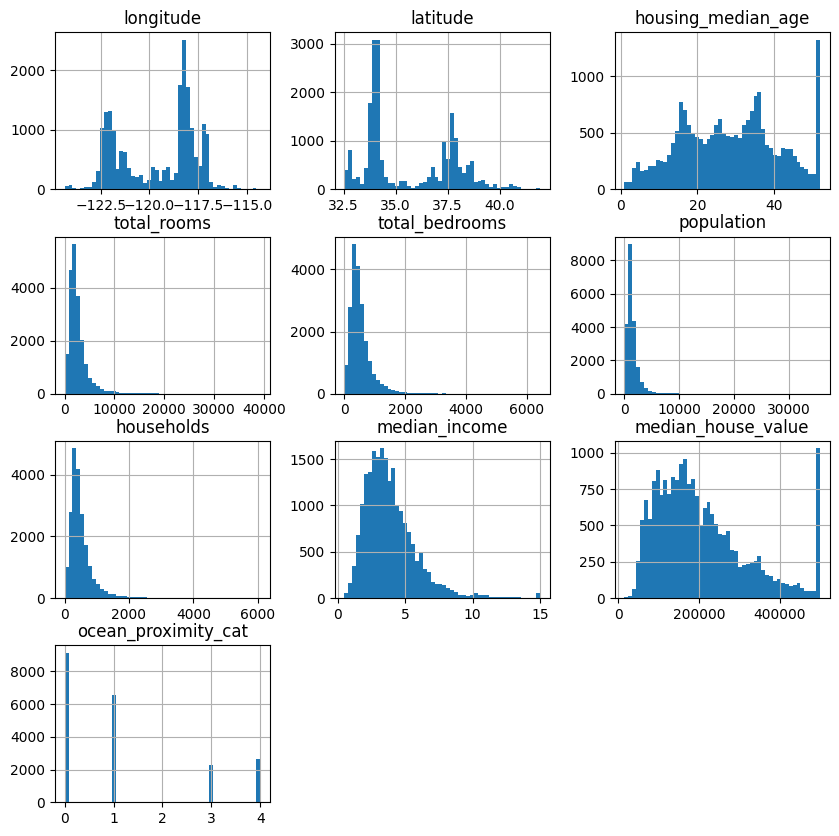

In [15]:
df.hist(bins = 50, figsize = (10,10))
plt.show()

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


We are not going to normalize the categorical feature, so let's drop it and then concatenate.

In [17]:
df_to_transform = df.drop(labels=['ocean_proximity', 'ocean_proximity_cat'], axis=1)

In [18]:
df_transformed = PowerTransformer(method='yeo-johnson', standardize=True).fit_transform(df_to_transform)

In [19]:
df_transformed_pd = pd.DataFrame(df_transformed, columns = df_to_transform.columns)

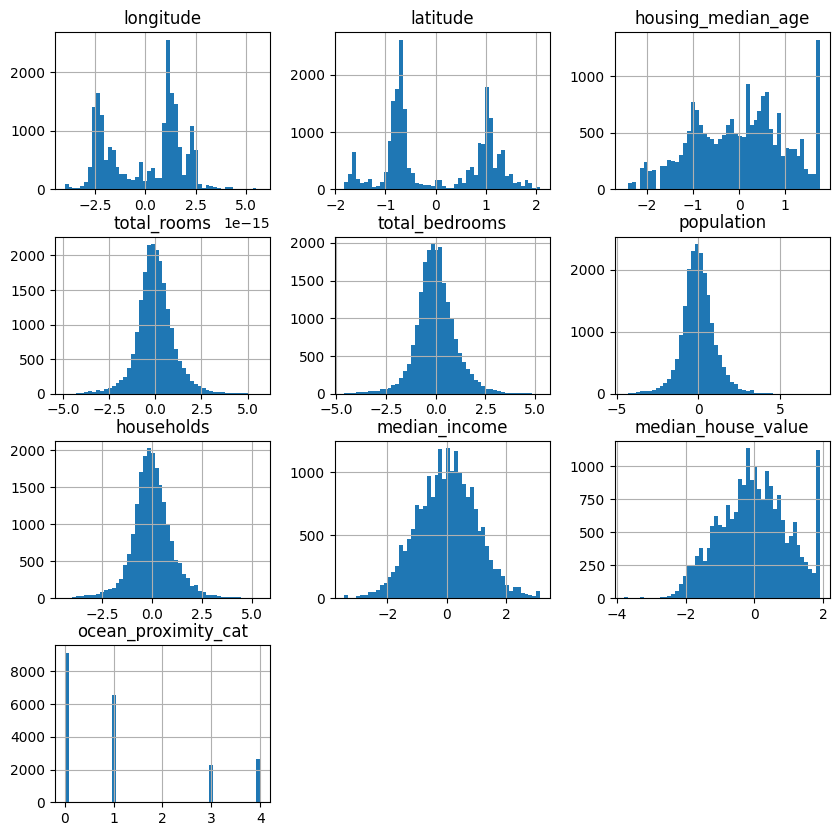

In [20]:
df_transformed_pd = df_transformed_pd.join(df['ocean_proximity_cat'])
df_transformed_pd.hist(bins = 50, figsize = (10,10))
plt.show()

We have fixed skeweness of the data quite nice. Now let's prepare data for training and compare various algorithms. 

In [21]:
train, test = train_test_split(df_transformed_pd, test_size=0.2,random_state=0)

In [22]:
y_train = train['median_house_value']
X_train = train.drop("median_house_value", axis=1)

y_test = test['median_house_value']
X_test = test.drop('median_house_value', axis=1)

In [23]:
X_train.shape, X_test.shape

((16512, 9), (4128, 9))

In [24]:
y_train.shape, y_test.shape

((16512,), (4128,))

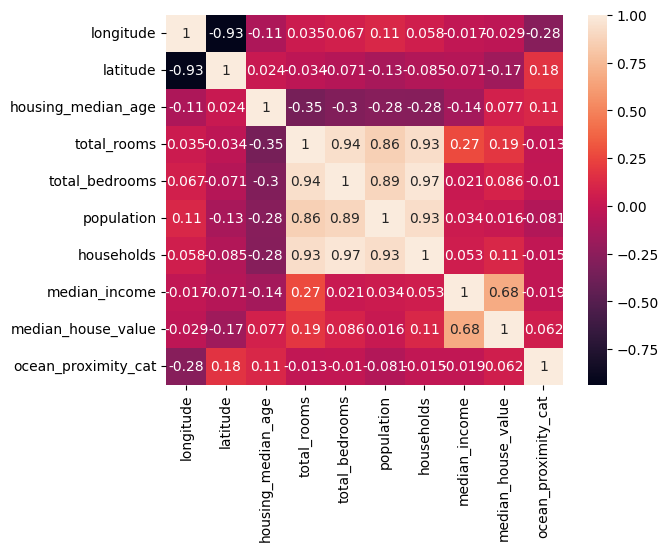

In [25]:
sns.heatmap(df_transformed_pd.corr(), annot = True)
plt.show()

It is common practice to delete highly correlated features (between feature and target value - median house value) if there are more keep the only one so thus we can manually regularize the data, however there is only one highly postive correlated feature - median income, hence we can keep this one.

# DNN with GridSearchCV

Using wrapper from __SciKeras__ as the wrapper from ScikitLearn is not supported anymore.
<br>
<br> https://www.adriangb.com/scikeras/stable/advanced.html

In [26]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

In [41]:
def build_model(n_hidden, n_neurons, learning_rate, input_shape):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape = input_shape))
    
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation = 'relu'))
    
    model.add(tf.keras.layers.Dense(1))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(loss='mean_absolute_error', optimizer = optimizer)
    
    #print (model.summary()) 
    
    return model             

In [42]:
#build_model(1,128,0.01,9) #just to check build_model function, acc. to best_model.summary() from KerasTuner Hyperband

In [43]:
model = KerasRegressor(model = build_model,
                       n_hidden = 1,
                       n_neurons = 1,
                       learning_rate = 0.03,
                       input_shape=[9],
                       verbose = 0
                      )

In [44]:
n_hidden = [1] # can be more but to have comparison with Keras Tuner
n_neurons = [16, 32, 64, 128]
learning_rate = [0.01, 0.001, 0.0001]

__n_jobs__ : int, default=None
    Number of jobs to run in parallel.
    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all processors.
    
__cv__ : int, cross-validation generator or an iterable, default=None
    Determines the cross-validation splitting strategy.
    Possible inputs for cv are:

    - None, to use the default 5-fold cross validation,
    - integer, to specify the number of folds in a `(Stratified)KFold`,
    - :term:`CV splitter`,
    - An iterable yielding (train, test) splits as arrays of indices.

In [56]:
param_grid = dict(n_hidden = n_hidden, n_neurons = n_neurons, learning_rate = learning_rate)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid_search.fit(X_train, y_train, epochs = 50,
                            validation_data = (X_test, y_test),
                            callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3)])

In [57]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.742442 (0.004382) with: {'learning_rate': 0.01, 'n_hidden': 1, 'n_neurons': 16}
0.758573 (0.005192) with: {'learning_rate': 0.01, 'n_hidden': 1, 'n_neurons': 32}
0.754769 (0.015425) with: {'learning_rate': 0.01, 'n_hidden': 1, 'n_neurons': 64}
0.766812 (0.005580) with: {'learning_rate': 0.01, 'n_hidden': 1, 'n_neurons': 128}
0.737332 (0.007127) with: {'learning_rate': 0.001, 'n_hidden': 1, 'n_neurons': 16}
0.752800 (0.004575) with: {'learning_rate': 0.001, 'n_hidden': 1, 'n_neurons': 32}
0.760088 (0.009062) with: {'learning_rate': 0.001, 'n_hidden': 1, 'n_neurons': 64}
0.771815 (0.007923) with: {'learning_rate': 0.001, 'n_hidden': 1, 'n_neurons': 128}
0.687767 (0.002034) with: {'learning_rate': 0.0001, 'n_hidden': 1, 'n_neurons': 16}
0.717409 (0.004138) with: {'learning_rate': 0.0001, 'n_hidden': 1, 'n_neurons': 32}
0.729396 (0.005951) with: {'learning_rate': 0.0001, 'n_hidden': 1, 'n_neurons': 64}
0.735424 (0.004025) with: {'learning_rate': 0.0001, 'n_hidden': 1, 'n_neurons': 128}


And here we have the best results out of our defined GridSearch dictionary values:

In [58]:
grid_result.best_params_

{'learning_rate': 0.001, 'n_hidden': 1, 'n_neurons': 128}

In [59]:
final_model = build_model(1, 128, 0.001, input_shape=[9])

In [60]:
final_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1280      
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [61]:
final_result = final_model.fit(X_train, y_train, epochs = 50,
                            validation_data = (X_test, y_test),
                            callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3)])

Epoch 1/50
516/516 [==============================] - 1s 1ms/step - loss: 0.4645 - val_loss: 0.4057
Epoch 2/50
516/516 [==============================] - 1s 1ms/step - loss: 0.3945 - val_loss: 0.3864
Epoch 3/50
516/516 [==============================] - 0s 943us/step - loss: 0.3820 - val_loss: 0.3805
Epoch 4/50
516/516 [==============================] - 0s 945us/step - loss: 0.3764 - val_loss: 0.3772
Epoch 5/50
516/516 [==============================] - 0s 954us/step - loss: 0.3726 - val_loss: 0.3735
Epoch 6/50
516/516 [==============================] - 0s 950us/step - loss: 0.3696 - val_loss: 0.3755
Epoch 7/50
516/516 [==============================] - 0s 928us/step - loss: 0.3657 - val_loss: 0.3719
Epoch 8/50
516/516 [==============================] - 0s 955us/step - loss: 0.3636 - val_loss: 0.3718
Epoch 9/50
516/516 [==============================] - 0s 953us/step - loss: 0.3627 - val_loss: 0.3721
Epoch 10/50
516/516 [==============================] - 0s 934us/step - loss: 0.3603 - 

In [63]:
mae = final_model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 771us/step - loss: 0.3731


In [64]:
mae

0.3730538487434387